In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Loading Boston House Pricing Dataset

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()

In [5]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Converting the data into DataFrame

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)

Adding the Target column into the DataFrame

In [7]:
df['Target'] = data.target

Checking the info of the data frame such as Dtype, non null count

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Checking the null count

In [9]:
df.isnull().sum() # null count is zero

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

Exploratory Data Analysis (EDA)

1. Checking if there is multocorrelity or not

In [10]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


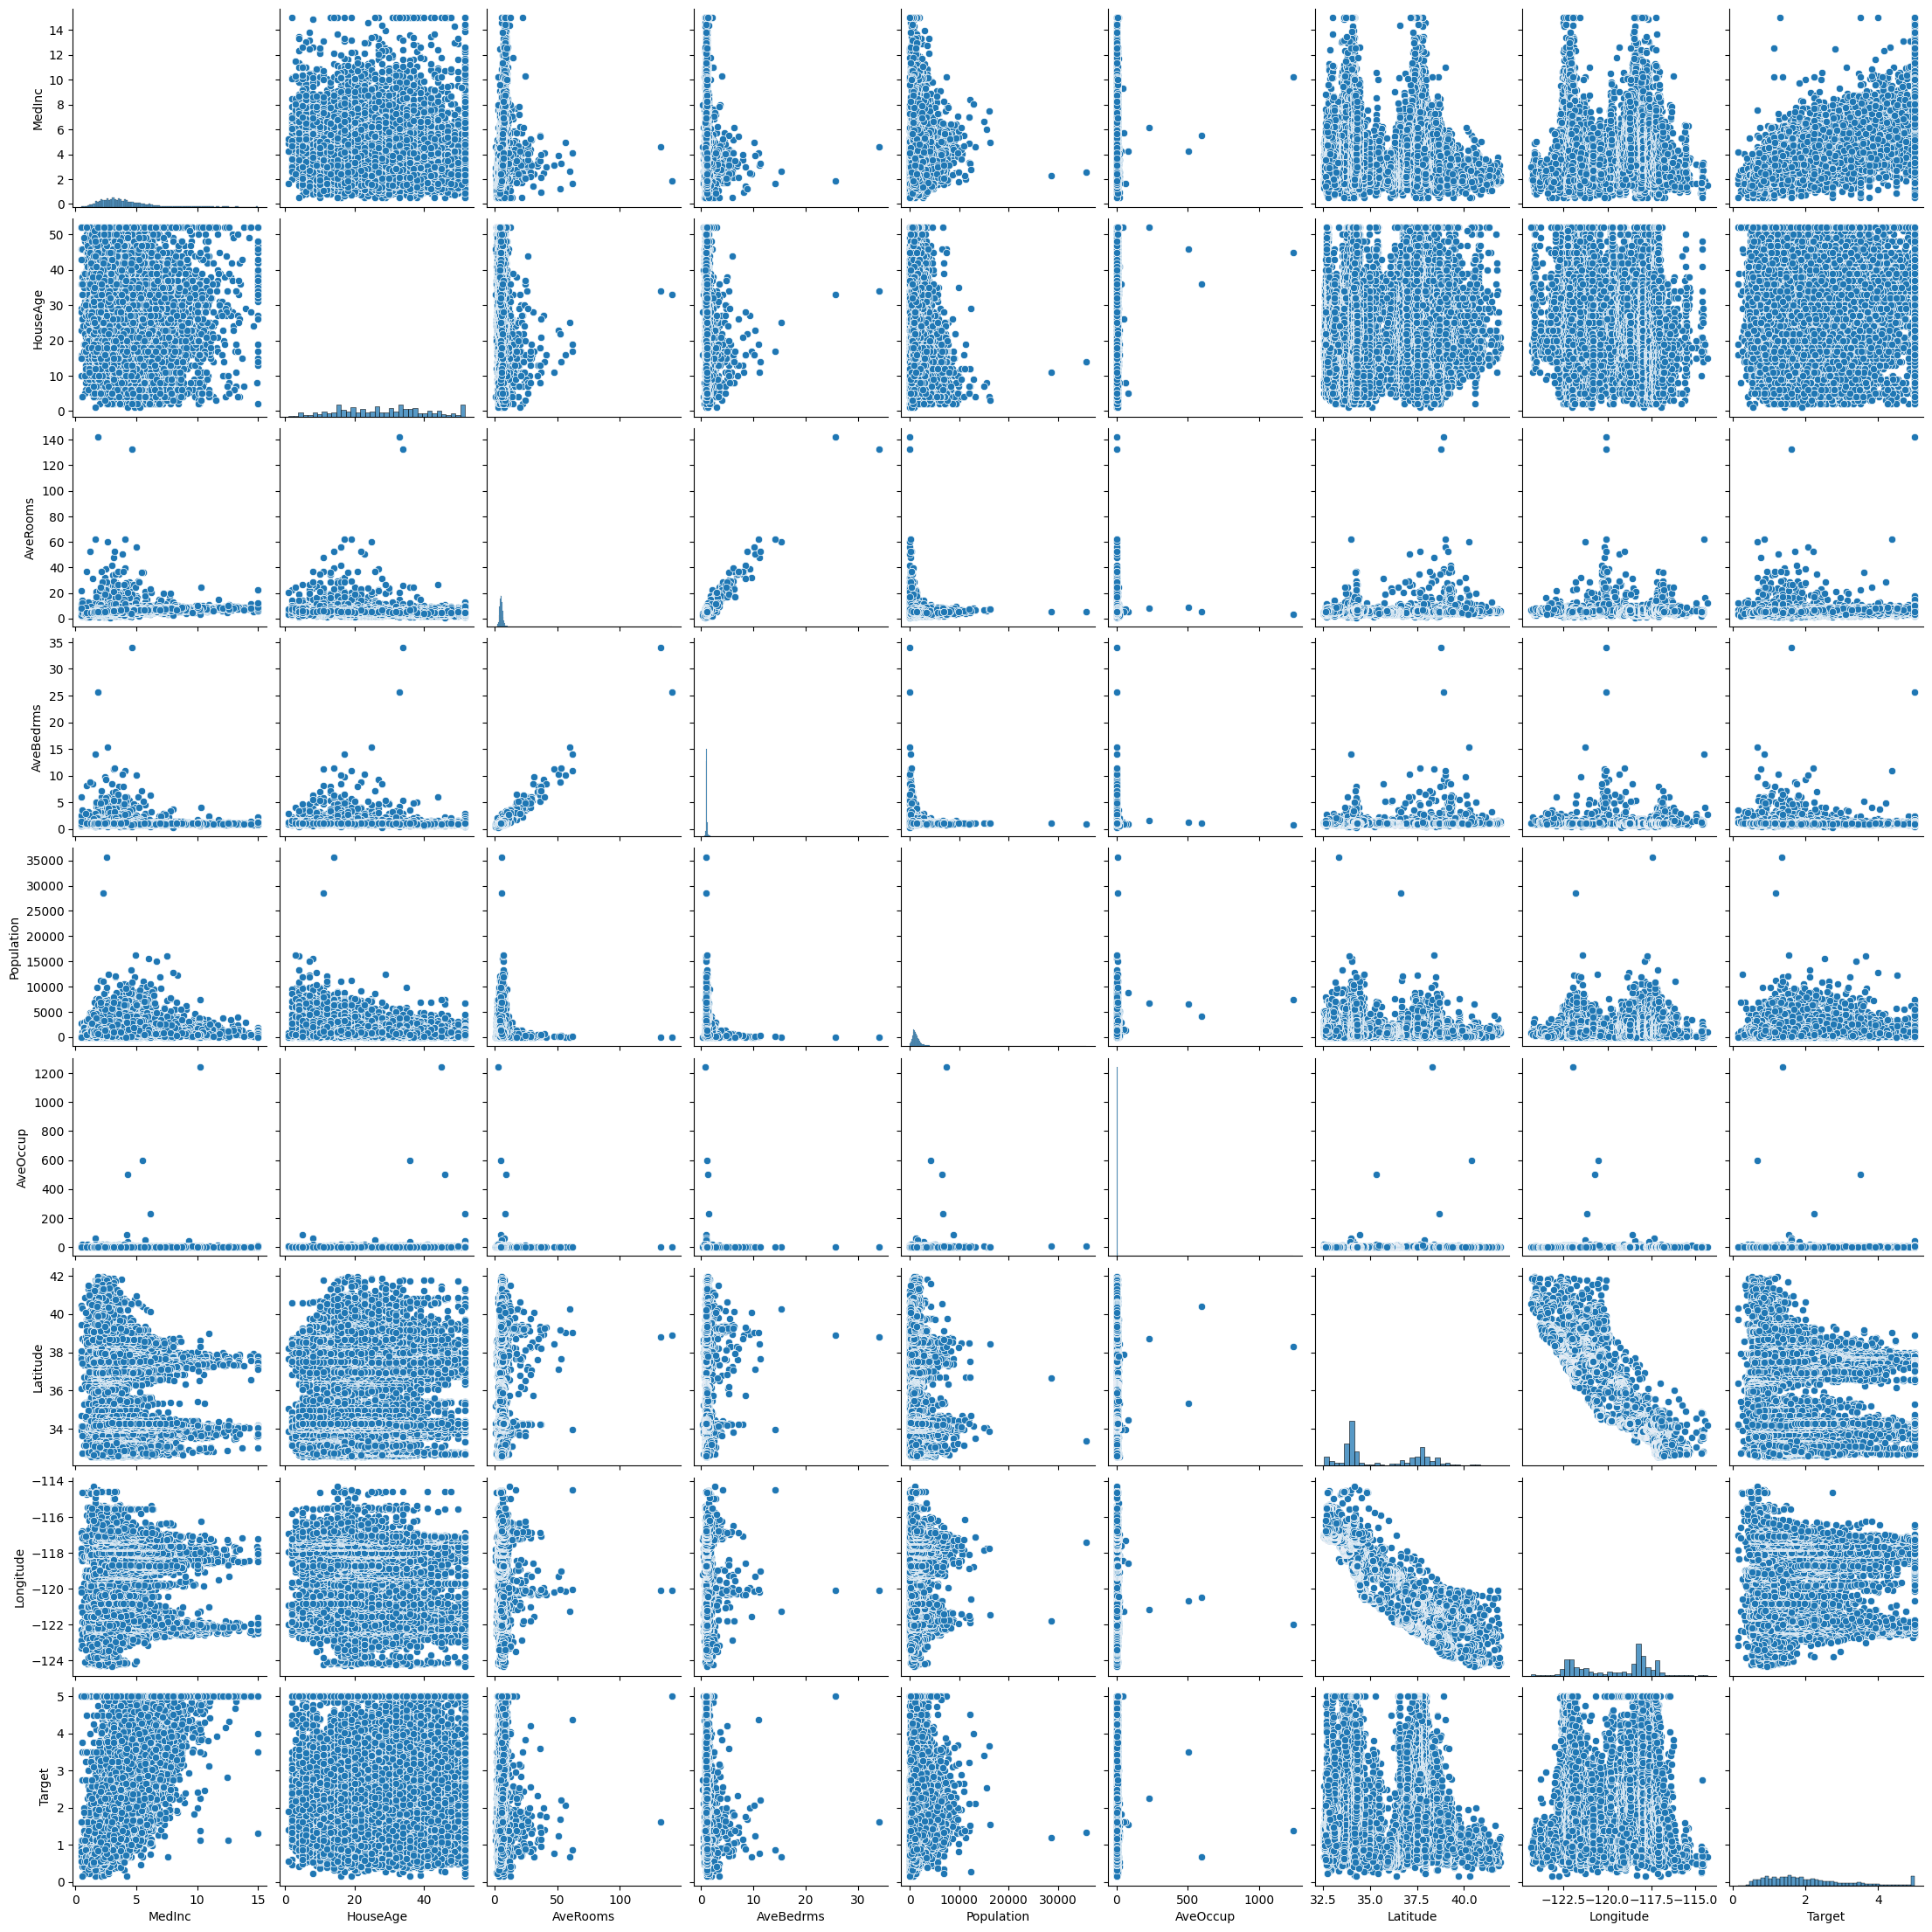

In [11]:
sns.pairplot(df)

In [13]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Splitting feature into Independent and dependent feature

In [14]:
X = df.iloc[0::, 0:-1]
y = df['Target']

In [15]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

Train Test Split

In [18]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=2)

Standardizing the dataset

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[-0.22773123,  0.66216492, -0.40153672, ...,  0.03659087,
        -0.86962149,  0.83642573],
       [-1.53896953,  1.85456687, -1.16952553, ..., -0.12841281,
         2.41977311, -2.30311441],
       [-1.16414855,  0.42368453, -0.66551415, ...,  0.06709077,
        -0.77150034,  0.63677294],
       ...,
       [ 0.33397098, -0.76871742,  0.20909721, ..., -0.02531583,
         1.54135524, -0.83067507],
       [-0.68262904,  0.82115185, -0.78836045, ...,  0.015976  ,
        -0.68272407,  0.70665142],
       [-0.85580247,  0.18520414, -0.12616952, ..., -0.00936041,
         2.41977311, -2.28314913]], shape=(14448, 8))

In [22]:
X_test

array([[ 1.34781884, -1.08669127,  0.9124149 , ...,  0.01813584,
        -0.94438045,  0.95122609],
       [ 0.16910691, -1.32517166,  0.39502348, ..., -0.02357955,
         1.40118217, -0.67594416],
       [-1.12397782,  0.503178  , -0.02016179, ...,  0.09762319,
        -0.79019008,  0.66172954],
       ...,
       [ 0.283268  , -0.29175664,  0.78394227, ..., -0.02578084,
         0.97131811, -0.69091812],
       [ 0.45347758, -0.68922395, -0.19630635, ..., -0.03489519,
        -0.78551765,  0.83143441],
       [-0.14013892,  1.53659302, -0.18445117, ..., -0.01200154,
         0.60686814, -1.09521502]], shape=(6192, 8))

Model training

1. importing the linear regression model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression()

2. Training the model

In [26]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# cofficient
print(regressor.coef_)

[ 0.83663796  0.11413457 -0.26632816  0.28259208 -0.00452626 -0.04588287
 -0.87152168 -0.84243947]


In [29]:
# intercept
print(regressor.intercept_)

2.0621883720930274


In [31]:
# on which parameter the model has been trained
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

Prediction with test data

In [32]:
y_pred = regressor.predict(X_test)

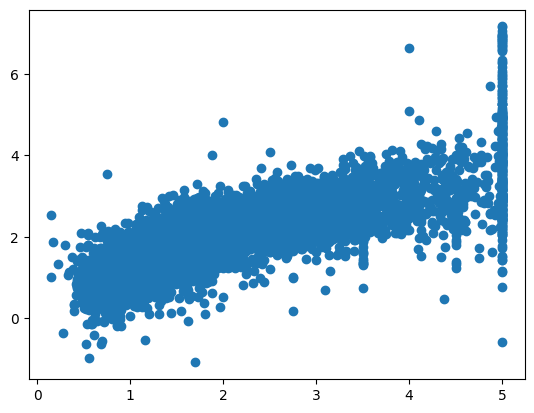

In [33]:
# plot a scatter plot for the prediction
plt.scatter(y_test, y_pred)

In [34]:
residuals = y_test - y_pred

In [35]:
residuals

10385   -0.025196
1943     0.813910
7490    -0.468685
16889    1.055379
11416    0.480033
           ...   
16911   -0.453318
15066   -0.232594
19410   -0.087118
10126   -0.080802
18568   -0.548881
Name: Target, Length: 6192, dtype: float64

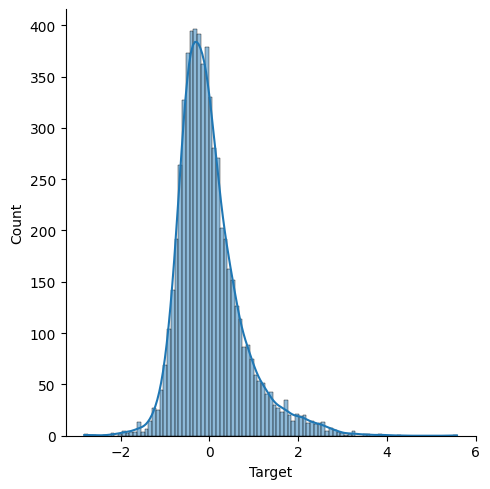

In [36]:
# Lets plot this residual
sns.displot(residuals, kde = True)

Performance metrics

In [40]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

In [38]:
mse(y_test, y_pred)

0.5390898360437728

In [39]:
mae(y_test, y_pred)

0.5362588391493067

In [43]:
score = r2_score(y_test, y_pred)
score

0.6015507891610433

New Data Prediction


In [49]:
data.data[0].reshape(1, -1).shape

(1, 8)

In [53]:
# transformation of new data
scaler.transform(data.data[0].reshape(1, -1))

c:\Users\omkar\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.36071405,  0.98013878,  0.67761503, -0.15273601, -0.95066911,
        -0.0471939 ,  1.05542194, -1.33479837]])

In [54]:
regressor.predict(scaler.transform(data.data[0].reshape(1, -1)))

c:\Users\omkar\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.13662122])

Pickling the model file for deployment

In [56]:
import pickle

In [58]:
pickle.dump(regressor, open('regmodel.pkl', 'wb'))

In [59]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [61]:
pickled_model.predict(scaler.transform(data.data[0].reshape(1, -1)))

c:\Users\omkar\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.13662122])